# ⚡ Energy Consumption Analysis using UK-DALE Dataset

This notebook presents an in-depth exploration of household energy consumption using data from the **UK Domestic Appliance-Level Electricity (UK-DALE)** dataset. The primary goal is to monitor, analyze, and visualize power usage patterns across individual appliances within a UK home using high-resolution sub-metered electricity data.

## 📁 Dataset Overview
- **Source**: UK-DALE (UK Domestic Appliance-Level Electricity)
- **Household**: House 1 *(can be updated to any house from the dataset)*
- **Appliances Monitored**: Includes laptop, fridge, washing machine, cooker, server, kettle, TV, router, etc.
- **Time Granularity**: Sub-metered appliance data recorded at **1-second resolution**
- **Aggregate Channel**: Manually reconstructed by summing all individual appliance channels
- **Mains Channel**: Available but not used in this analysis

## 🎯 Project Objectives
- Visualize power consumption trends over different timeframes (daily, weekly, monthly)
- Identify the most energy-consuming appliances in the household
- Detect anomalies and unusual usage spikes
- Reconstruct and analyze the aggregate energy usage
- Build an interactive dashboard for exploratory energy analysis

## 🛠️ Tools & Technologies Used
- `Pandas` for data handling and manipulation
- `Plotly` for interactive and dynamic visualizations
- `Streamlit` for building a user-facing dashboard
- `Jupyter Notebook` for step-by-step exploratory analysis and presentation

## 📚 References
- Kelly, J. and Knottenbelt, W. (2015). [The UK-DALE dataset](https://doi.org/10.1016/j.ijepes.2014.07.075): Domestic Appliance-Level Electricity Demand Dataset.
- [UK-DALE Dataset from kaggle](https://www.kaggle.com/datasets/joragasy/uk-dale)

---

✅ This analysis aims to provide valuable insights into household energy efficiency and enable smarter decisions through appliance-level monitoring.


## Imports

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

## Appliance and channel numbers

In [2]:
channel_map = {
    1: "aggregate",
    2: "boiler",
    3: "solar_thermal_pump",
    4: "laptop",
    5: "washing_machine",
    6: "dishwasher",
    7: "tv",
    8: "kitchen_lights",
    9: "htpc",
    10: "kettle",
    11: "toaster",
    12: "fridge",
    13: "microwave",
    14: "lcd_office",
    15: "hifi_office",
    16: "breadmaker",
    17: "amp_livingroom",
    18: "adsl_router",
    19: "livingroom_s_lamp",
    20: "soldering_iron",
    21: "gigE_&_USBhub",
    22: "hoover",
    23: "kitchen_dt_lamp",
    24: "bedroom_ds_lamp",
    25: "lighting_circuit",
    26: "livingroom_s_lamp2",
    27: "iPad_charger",
    28: "subwoofer_livingroom",
    29: "livingroom_lamp_tv",
    30: "DAB_radio_livingroom",
    31: "kitchen_lamp2",
    32: "kitchen_phone&stereo",
    33: "utilityrm_lamp",
    34: "samsung_charger",
    35: "bedroom_d_lamp",
    36: "coffee_machine",
    37: "kitchen_radio",
    38: "bedroom_chargers",
    39: "hair_dryer",
    40: "straighteners",
    41: "iron",
    42: "gas_oven",
    43: "data_logger_pc",
    44: "childs_table_lamp",
    45: "childs_ds_lamp",
    46: "baby_monitor_tx",
    47: "battery_charger",
    48: "office_lamp1",
    49: "office_lamp2",
    50: "office_lamp3",
    51: "office_pc",
    52: "office_fan",
    53: "LED_printer"
}


## Load and combine individual channels into 1 dataframe

In [3]:
base_path = Path("ukdale/house_1")
df_dict = {}

for ch, name in channel_map.items():
    file_path = base_path / f"channel_{ch}.dat"
    try:
        df = pd.read_csv(file_path, sep=" ", names=["timestamp", name], engine="python", nrows=100000)
        df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
        df.set_index("timestamp", inplace=True)
        df_dict[name] = df
    except Exception as e:
        print(f"Couldn't load {name} (channel {ch}): {e}")

df_all = pd.concat(df_dict.values(), axis=1)

# Data Exploration

In [4]:
df_all.head()

,aggregate,boiler,solar_thermal_pump,laptop,washing_machine,dishwasher,tv,kitchen_lights,htpc,kettle,...,childs_table_lamp,childs_ds_lamp,baby_monitor_tx,battery_charger,office_lamp1,office_lamp2,office_lamp3,office_pc,office_fan,LED_printer
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-11-09 22:28:15,599.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-09 22:28:18,NaN,NaN,NaN,NaN,0.0,1.0,98.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-09 22:28:21,582.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-09 22:28:23,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-09 22:28:24,NaN,NaN,NaN,NaN,0.0,1.0,100.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Viewing individual channels to observe timestamps

In [5]:
df_dict["aggregate"]

,aggregate
timestamp,
2012-11-09 22:28:15,599
2012-11-09 22:28:21,582
2012-11-09 22:28:27,600
2012-11-09 22:28:33,586
2012-11-09 22:28:40,596
...,...
2012-11-17 20:51:57,401
2012-11-17 20:52:03,399
2012-11-17 20:52:09,397


In [6]:
df_dict["DAB_radio_livingroom"]

,DAB_radio_livingroom
timestamp,
2013-03-12 11:53:49,0
2013-03-12 11:53:55,0
2013-03-12 11:54:02,0
2013-03-12 11:54:09,0
2013-03-12 11:54:15,0
...,...
2013-03-20 06:47:10,0
2013-03-20 06:47:17,0
2013-03-20 06:47:23,0


### checking for null values in the individual channels

In [7]:
# print out number of null values in each channel.
for name, df in list(df_dict.items())[1:]:
    if df.isnull().values.any():
        print(f"⚠️ {name} has {df.isnull().sum().sum()} missing values.")

#### ✅ No individual appliance channel contains missing values.

Upon inspecting each channel independently, we found no null values. However, after merging all channels into a single dataframe (aligned by timestamp), `NaN` values appear. This is expected and arises due to slight timestamp misalignments across different appliances. These gaps occur because not all appliances record data at exactly the same time intervals.


In [8]:
df_all = df_all.fillna(0)  # Fill missing values with 0, assuming no power usage was recorded at those timestamps

We fill the missing values (`NaN`) with `0`, assuming that no appliance activity was recorded at those timestamps. This maintains temporal consistency while preserving the integrity of the dataset.


In [9]:
df_all.head()

,aggregate,boiler,solar_thermal_pump,laptop,washing_machine,dishwasher,tv,kitchen_lights,htpc,kettle,...,childs_table_lamp,childs_ds_lamp,baby_monitor_tx,battery_charger,office_lamp1,office_lamp2,office_lamp3,office_pc,office_fan,LED_printer
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-11-09 22:28:15,599.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-11-09 22:28:18,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-11-09 22:28:21,582.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-11-09 22:28:23,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-11-09 22:28:24,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_all.tail()

,aggregate,boiler,solar_thermal_pump,laptop,washing_machine,dishwasher,tv,kitchen_lights,htpc,kettle,...,childs_table_lamp,childs_ds_lamp,baby_monitor_tx,battery_charger,office_lamp1,office_lamp2,office_lamp3,office_pc,office_fan,LED_printer
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-04-10 21:32:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-10 21:32:37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-10 21:32:43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-10 21:32:49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-10 21:32:55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 🔍 Observation:
Many appliances show a sequence of `0` values toward the end of the dataset. This suggests that those appliances were either:
- **Not active**, or  
- **No longer being recorded** during those time frames.

This could be due to sensor deactivation, disconnection, or simply the end of their usage within the monitored period.


### 🕒 Print out Time Frames of All Appliances

This helps us understand the overlapping and intersecting durations during which each appliance was being monitored.


In [11]:
for appliance, df in df_dict.items():
    start = df.index.min()
    end = df.index.max()
    print(f"{appliance:>25}: {start} → {end}")

                aggregate: 2012-11-09 22:28:15 → 2012-11-17 20:52:22
                   boiler: 2012-11-09 22:28:23 → 2012-11-20 04:16:13
       solar_thermal_pump: 2012-11-09 22:28:35 → 2012-11-20 04:28:02
                   laptop: 2012-11-16 11:29:01 → 2012-11-29 21:56:19
          washing_machine: 2012-11-09 22:28:18 → 2012-11-17 08:28:14
               dishwasher: 2012-11-09 22:28:18 → 2012-11-17 09:11:11
                       tv: 2012-11-09 22:28:18 → 2012-11-22 00:54:20
           kitchen_lights: 2012-11-12 18:24:46 → 2012-11-22 01:09:32
                     htpc: 2012-12-14 22:21:32 → 2012-12-27 01:27:25
                   kettle: 2012-11-09 22:28:18 → 2012-12-16 08:09:53
                  toaster: 2012-12-14 22:21:32 → 2012-12-27 09:03:28
                   fridge: 2012-12-14 22:21:32 → 2012-12-27 01:48:13
                microwave: 2012-12-14 22:21:33 → 2012-12-27 01:15:42
               lcd_office: 2012-12-14 22:21:33 → 2012-12-27 01:16:31
              hifi_office: 2012-12

### 🧹 Data Cleaning: Time Trimming and Manual Aggregate

From the UK-DALE paper, the **aggregate channel** is simply the sum of power consumed by all sub-metered appliances. However, due to differences in recording windows, many appliances stopped logging after 2013.

In [12]:
# Trim time range to shared recording window across appliances
start_time = pd.to_datetime("2012-11-09")
end_time = pd.to_datetime("2013-03-29") 

for name in df_dict:
    df_dict[name] = df_dict[name].loc[start_time:end_time]

In [13]:
# Create a full datetime index from start to end (1-second interval)
common_index = pd.date_range(start=start_time, end=end_time, freq="s")  # Sampling is 1 second

# Initialize an empty aggregate DataFrame with common index
aggregate_df = pd.DataFrame(index=common_index)
aggregate_df["aggregate"] = 0.0

# Sum each appliance onto the aggregate
for name, df in df_dict.items():
    df_aligned = df.reindex(common_index, fill_value=0)
    aggregate_df["aggregate"] += df_aligned[name]

# Add the new aggregate to df_dict
df_dict["aggregate"] = aggregate_df


To maintain consistency and accuracy:
- We trimmed the dataset to a period where all selected appliances were actively recording: **from 2012 to 2013**.
- A **new aggregate channel** was created manually by summing the individual appliance readings.

In [14]:
df_dict["aggregate"].head()

,aggregate
2012-11-09 00:00:00,0.0
2012-11-09 00:00:01,0.0
2012-11-09 00:00:02,0.0
2012-11-09 00:00:03,0.0
2012-11-09 00:00:04,0.0


#### ⚙️ Unit Clarification: Apparent Energy (VAh)

The UK-DALE dataset records instantaneous power in **VA (Volt-Amperes)** — i.e., apparent power.

Since each data point is sampled at **1-second intervals**, we calculate **apparent energy** in **VAh** using:

\[
\text{VAh} = \frac{\text{VA}}{3600}
\]

> ⚠️ Note: We do not assume a power factor, as that would introduce inaccuracy.  
> For this analysis, **VAh** offers a valid, assumption-free measure of energy trends and comparisons.


In [15]:
# Convert each appliance's power readings to VAh (1-second intervals)
for name in df_dict:
    df_dict[name] = df_dict[name] / 3600

In [16]:
df_dict

{'aggregate':                      aggregate
 2012-11-09 00:00:00        0.0
 2012-11-09 00:00:01        0.0
 2012-11-09 00:00:02        0.0
 2012-11-09 00:00:03        0.0
 2012-11-09 00:00:04        0.0
 ...                        ...
 2013-03-28 23:59:56        0.0
 2013-03-28 23:59:57        0.0
 2013-03-28 23:59:58        0.0
 2013-03-28 23:59:59        0.0
 2013-03-29 00:00:00        0.0
 
 [12096001 rows x 1 columns],
 'boiler':                        boiler
 timestamp                    
 2012-11-09 22:28:23  0.017222
 2012-11-09 22:28:35  0.017222
 2012-11-09 22:28:47  0.015833
 2012-11-09 22:29:17  0.015833
 2012-11-09 22:29:29  0.015833
 ...                       ...
 2012-11-20 04:15:49  0.003333
 2012-11-20 04:15:55  0.003333
 2012-11-20 04:16:01  0.003333
 2012-11-20 04:16:07  0.003333
 2012-11-20 04:16:13  0.003333
 
 [100000 rows x 1 columns],
 'solar_thermal_pump':                      solar_thermal_pump
 timestamp                              
 2012-11-09 22:28:35    

# Data Visualisation

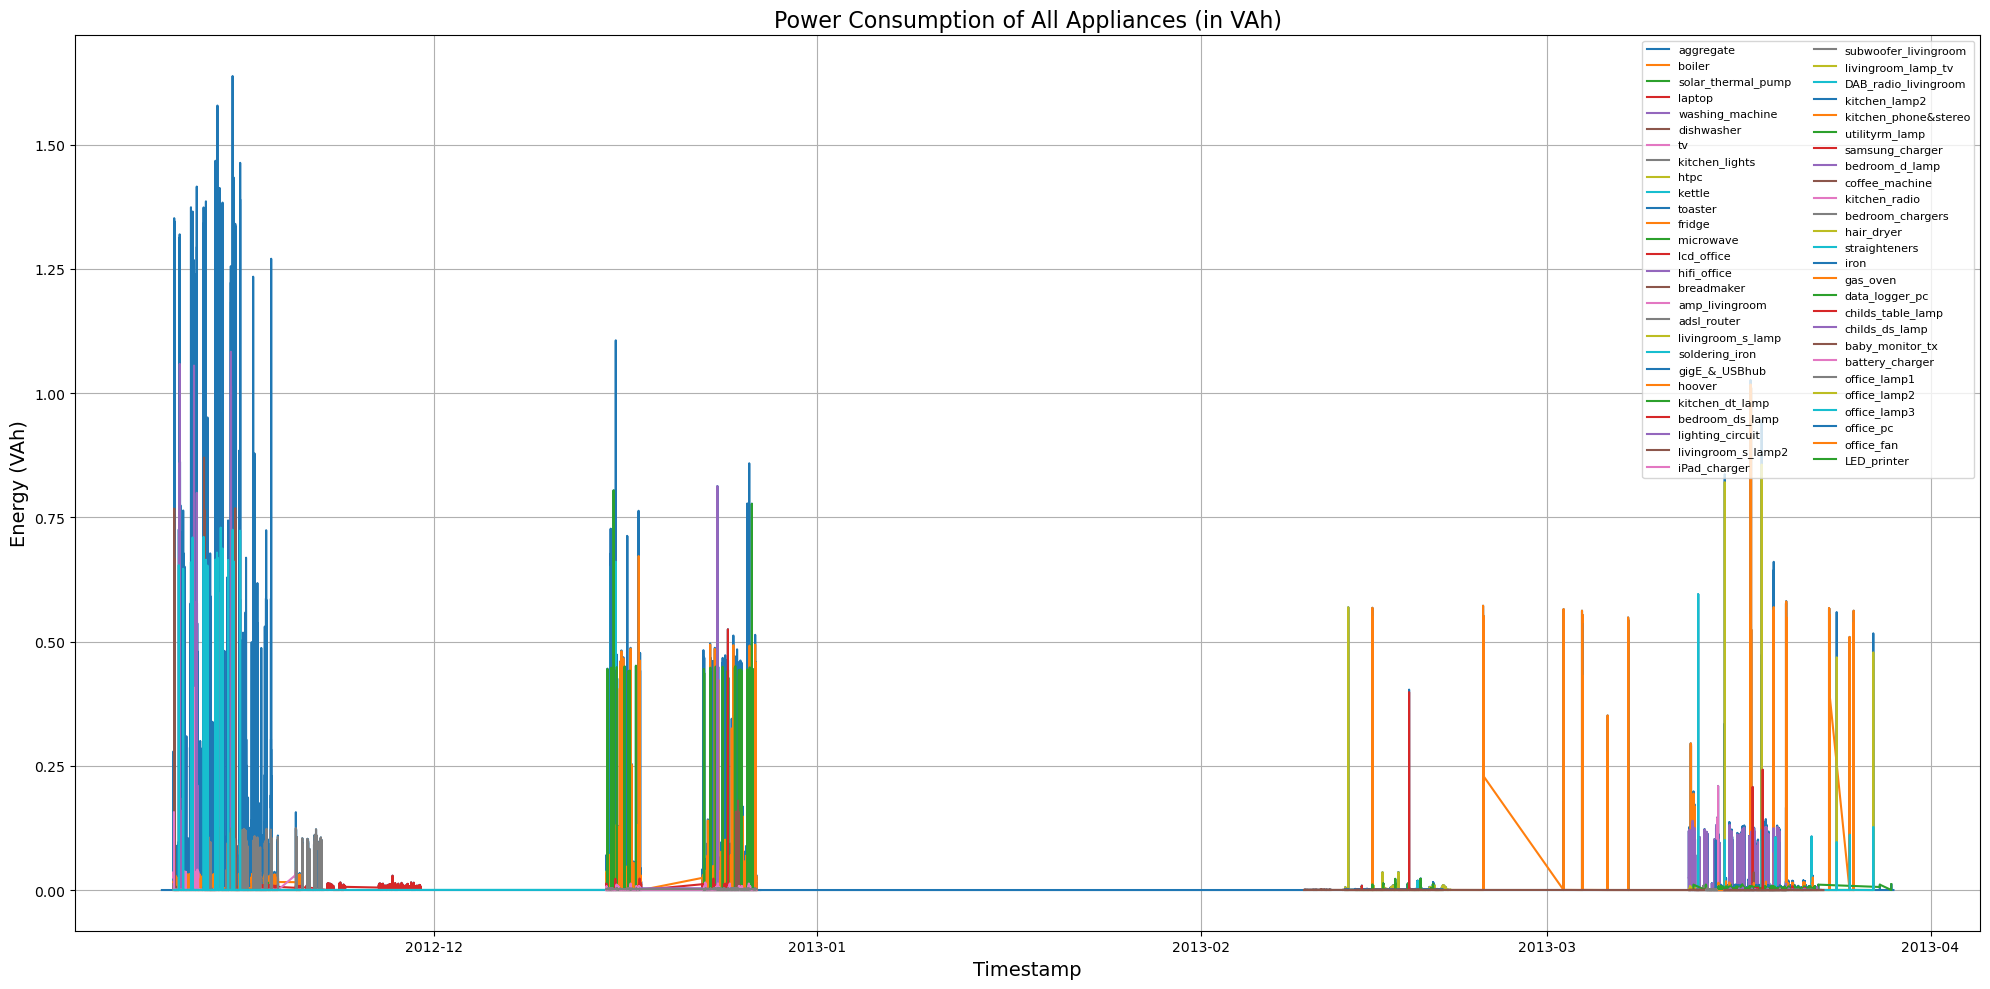

In [17]:
plt.figure(figsize=(20, 10))

for name, df in df_dict.items():
    plt.plot(df.index, df[name], label=name)

plt.title("Power Consumption of All Appliances (in VAh)", fontsize=16)
plt.xlabel("Timestamp", fontsize=14)
plt.ylabel("Energy (VAh)", fontsize=14)
plt.legend(loc="upper right", fontsize=8, ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


# Exporting cleaned data

In [18]:
output_dir = Path("cleaned_house1")
output_dir.mkdir(parents=True, exist_ok=True)

# Create the labels list
labels = []

In [19]:
# Assume the original mapping (from earlier)
appliance_channel_map = {
    "aggregate": 1,
    "boiler": 2,
    "solar_thermal_pump": 3,
    "laptop": 4,
    "washing_machine": 5,
    "dishwasher": 6,
    "tv": 7,
    "kitchen_lights": 8,
    "htpc": 9,
    "kettle": 10,
    "toaster": 11,
    "fridge": 12,
    "microwave": 13,
    "lcd_office": 14,
    "hifi_office": 15,
    "breadmaker": 16,
    "amp_livingroom": 17,
    "adsl_router": 18,
    "livingroom_s_lamp": 19,
    "soldering_iron": 20,
    "gigE_&_USBhub": 21,
    "hoover": 22,
    "kitchen_dt_lamp": 23,
    "bedroom_ds_lamp": 24,
    "lighting_circuit": 25,
    "livingroom_s_lamp2": 26,
    "iPad_charger": 27,
    "subwoofer_livingroom": 28,
    "livingroom_lamp_tv": 29,
    "DAB_radio_livingroom": 30,
    "kitchen_lamp2": 31,
    "kitchen_phone&stereo": 32,
    "utilityrm_lamp": 33,
    "samsung_charger": 34,
    "bedroom_d_lamp": 35,
    "coffee_machine": 36,
    "kitchen_radio": 37,
    "bedroom_chargers": 38,
    "hair_dryer": 39,
    "straighteners": 40,
    "iron": 41,
    "gas_oven": 42,
    "data_logger_pc": 43,
    "childs_table_lamp": 44,
    "childs_ds_lamp": 45,
    "baby_monitor_tx": 46,
    "battery_charger": 47,
    "office_lamp1": 48,
    "office_lamp2": 49,
    "office_lamp3": 50,
    "office_pc": 51,
    "office_fan": 52,
    "LED_printer": 53
}

In [20]:
for appliance, channel in appliance_channel_map.items():
    df = df_dict.get(appliance)
    if df is not None:
        export_df = df.reset_index() 
        export_df.columns = ["timestamp", appliance]  # Rename second column explicitly
        export_df["timestamp"] = export_df["timestamp"].astype(int) // 10**9  # UNIX seconds
        export_df = export_df[["timestamp", appliance]]

        file_path = output_dir / f"channel_{channel}.dat"
        export_df.to_csv(file_path, sep=" ", index=False, header=False)
        print(f"✅ Saved: {file_path}")

        labels.append(f"{channel} {appliance}")


✅ Saved: cleaned_house1/channel_1.dat
✅ Saved: cleaned_house1/channel_2.dat
✅ Saved: cleaned_house1/channel_3.dat
✅ Saved: cleaned_house1/channel_4.dat
✅ Saved: cleaned_house1/channel_5.dat
✅ Saved: cleaned_house1/channel_6.dat
✅ Saved: cleaned_house1/channel_7.dat
✅ Saved: cleaned_house1/channel_8.dat
✅ Saved: cleaned_house1/channel_9.dat
✅ Saved: cleaned_house1/channel_10.dat
✅ Saved: cleaned_house1/channel_11.dat
✅ Saved: cleaned_house1/channel_12.dat
✅ Saved: cleaned_house1/channel_13.dat
✅ Saved: cleaned_house1/channel_14.dat
✅ Saved: cleaned_house1/channel_15.dat
✅ Saved: cleaned_house1/channel_16.dat
✅ Saved: cleaned_house1/channel_17.dat
✅ Saved: cleaned_house1/channel_18.dat
✅ Saved: cleaned_house1/channel_19.dat
✅ Saved: cleaned_house1/channel_20.dat
✅ Saved: cleaned_house1/channel_21.dat
✅ Saved: cleaned_house1/channel_22.dat
✅ Saved: cleaned_house1/channel_23.dat
✅ Saved: cleaned_house1/channel_24.dat
✅ Saved: cleaned_house1/channel_25.dat
✅ Saved: cleaned_house1/channel_26

In [21]:
# Save labels.dat
labels_path = output_dir / "labels.dat"
with open(labels_path, "w") as f:
    f.write("\n".join(labels))

print(f"\n📝 labels.dat saved with {len(labels)} entries")


📝 labels.dat saved with 53 entries
